In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.display import clear_output
import sys
import scipy.stats as sts
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
class Network:
    def __init__(self, shape):
        """The base network class. This defines a simple feed-forward network with appropriate weights and biases.
        
        Arguments:
        shape (list-like): This defines the # of layers and # of neurons per layer in your network.
                           Each element of the array or list adds a new layer with the number neurons specified by the element.
        Variables:
        self.shape: see shape.
        self.weights: A list of numpy arrays containing the weights corresponding to each channel between neurons.
        self.biases: A list of numpy arrays containing the biases corresponding to each neuron.
        self.errors: A list of numpy arrays containing the error of each neurons in any iteration of the training process.
        self.eta: A float representing the learning rate.
        self.lam: A scale factor used in L2 regularization
        """
        
        self.shape = np.array(shape) #shape is array-like, i.e. (2,3,4) is a 2 input, 3 hidden node, 4 output network
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .1
        self.lam = .01
        self.wrong = 0
        self.total = 0
    def sigmoid(self, inputs):
        """Computes the sigmoid function of some input.
        
        Arguments:
        inputs (float or numpy array): The input or inputs to be fed through the sigmoid function.
        """
        
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        """Feeds inputs through the network and returns the output.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        
        Variables:
        self.activation: A list of numpy arrays corresponding to the output of each neuron in your network.
        """
        
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def calc_learning_rate(self,grad):
        if grad>.85:
            self.eta=.1/grad**.1*1/(.25*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.25)**2))
        else:
            self.eta=.1/grad**.6*1/(.4*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.4)**2))*(grad+.08)
        self.wrong+=grad
        self.total+=grad
    def comp_error(self, answer):
        """Computes the errors of each neuron.(Typically called Back Propagation)
        
        Arguments:
        answers (numpy array): The expected output from the network.
        """
#         if (self.activation[-1]-answer).any>.15:
#             self.eta = .005
#         else: 
#             self.eta = .5
        self.calc_learning_rate(np.amax(np.abs((self.activation[-1]-answer))))
        #print(np.amax(np.abs((self.activation[-1]-answer))))
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = np.pi*np.tan(np.pi/2*(self.activation[-1]-answer))*1/np.cos(np.pi/2*(self.activation[-1]-answer))**2*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        """Changes each variable based on the gradient descent algorithm."""
        
        #for i in range(len(self.biases)):
         #   self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        """Trains the network.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()
    def get_fractional_err(self):
        return(self.wrong)

# add piecewise def for learning rate


In [3]:
n1 = Network([2,15,1])
print n1.feedforward(np.array([1,2]))
for i in range(1000):
    n1.train(np.array([1,2]), np.array([.5]))
print n1.feedforward(np.array([1,2]))

[ 0.62458697]
[ 0.50024233]


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data[0]*.01)

[ 0.    0.    0.05  0.13  0.09  0.01  0.    0.    0.    0.    0.13  0.15
  0.1   0.15  0.05  0.    0.    0.03  0.15  0.02  0.    0.11  0.08  0.    0.
  0.04  0.12  0.    0.    0.08  0.08  0.    0.    0.05  0.08  0.    0.
  0.09  0.08  0.    0.    0.04  0.11  0.    0.01  0.12  0.07  0.    0.
  0.02  0.14  0.05  0.1   0.12  0.    0.    0.    0.    0.06  0.13  0.1   0.
  0.    0.  ]


In [5]:
num = []
for i in range(0,51):
    num.append(Network([64,7,10]))

In [6]:
# %timeit num.feedforward(digits.data[89]*.01)
# %timeit num.comp_error(np.eye(10)[digits.target[89]])
# %timeit num.grad_descent()

In [7]:
def Train_it(num, itera):
    iden = np.eye(10)
    acc = np.zeros((itera,))
    frac_err = np.zeros((itera,))
    trainer = zip(digits.data,digits.target)
    perm = np.random.permutation(trainer)
    trains = perm[:1000]
    test = perm[1001:]
    #num = Network([64, 14, 10])
    print num.feedforward(digits.data[89]*.01)
    for i in range(itera):
        print(float(100*i/(itera*1.0)))
        for dig, ans in trains:
            num.train(dig*.01,iden[ans])
        cor = 0
        tot = 0
        for dig, ans in test:
            if num.feedforward(dig*.01).argmax()==ans:
                cor += 1
            tot += 1
        acc[i] = cor/float(tot)
        frac_err[i] = num.get_fractional_err()
    return acc, frac_err

In [8]:
accu = np.zeros((50,1))
fracerr = np.zeros((50,1))
for i in range(50):
    print(i)
    accu[i], fracerr[i] = Train_it(num[i], 1)
print(accu)

0
[ 0.54665156  0.54156432  0.55756835  0.55958762  0.56182171  0.56829721
  0.56334126  0.56402282  0.57405461  0.55442191]
0.0
1
[ 0.54121921  0.56689558  0.56872768  0.55946418  0.57011306  0.54730528
  0.54462299  0.55660831  0.56218981  0.55190857]
0.0
2
[ 0.55901154  0.55175702  0.54113788  0.55684584  0.56502815  0.5657883
  0.56436593  0.5599947   0.55916243  0.56864924]
0.0
3
[ 0.55917745  0.54453012  0.55526192  0.55863285  0.5379503   0.56151904
  0.56670689  0.57082805  0.54486903  0.56068579]
0.0
4
[ 0.54125711  0.56592521  0.57502239  0.57689911  0.57093059  0.54813225
  0.55103731  0.56140474  0.57280598  0.54704628]
0.0
5
[ 0.54728482  0.5724975   0.55604339  0.57057547  0.55428472  0.54041472
  0.53548754  0.57636423  0.57128744  0.5464022 ]
0.0
6
[ 0.53004333  0.57674196  0.5487789   0.56193113  0.56604061  0.56953895
  0.55927519  0.54814158  0.56449464  0.55464425]
0.0
7
[ 0.5796739   0.57383721  0.57183371  0.59258735  0.54491452  0.56541129
  0.54023383  0.5769256

In [11]:
print(fracerr.argmax())
acc0, fracerr0 = Train_it(num[fracerr.argmax()], 200)

23
[ 0.3872491   0.3679      0.282111    0.3866667   0.34412149  0.30136423
  0.35301422  0.33283713  0.31035867  0.29758526]
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


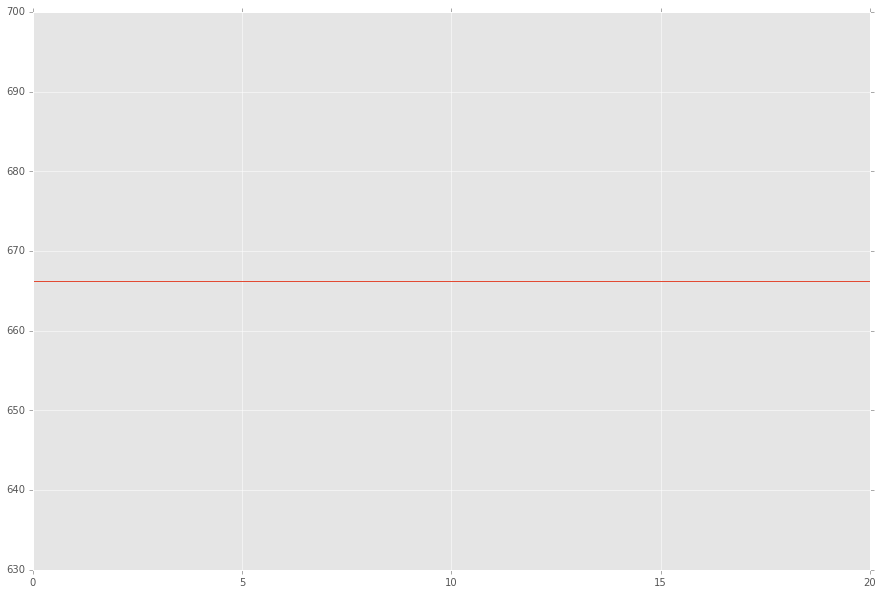

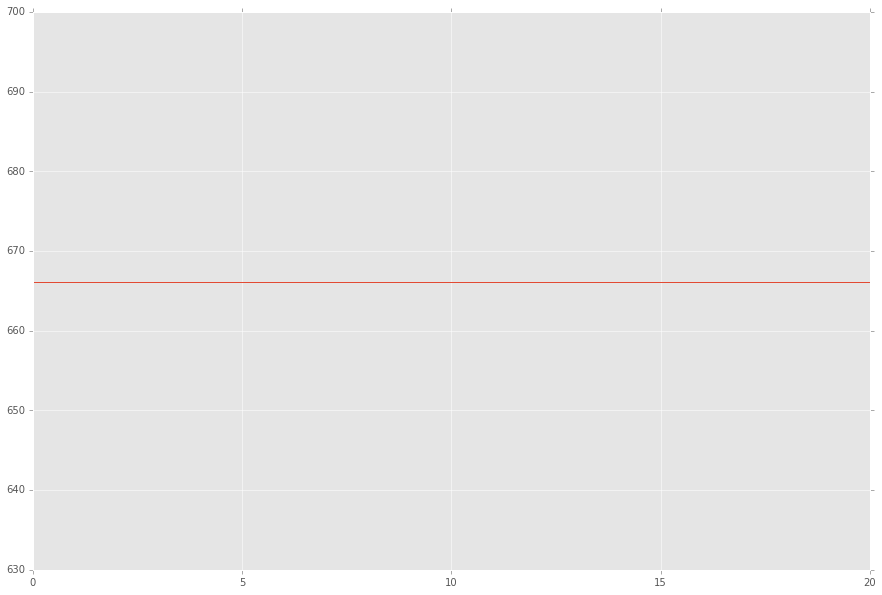

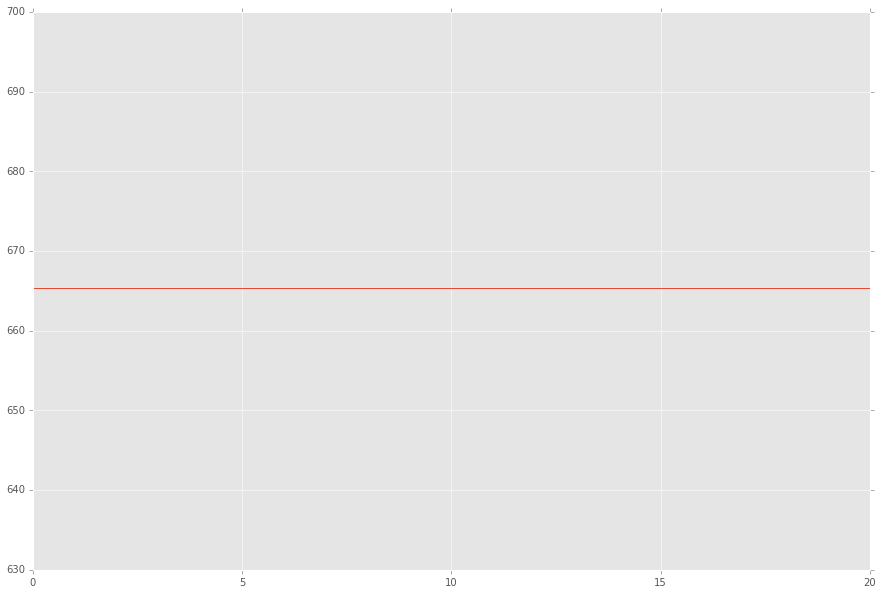

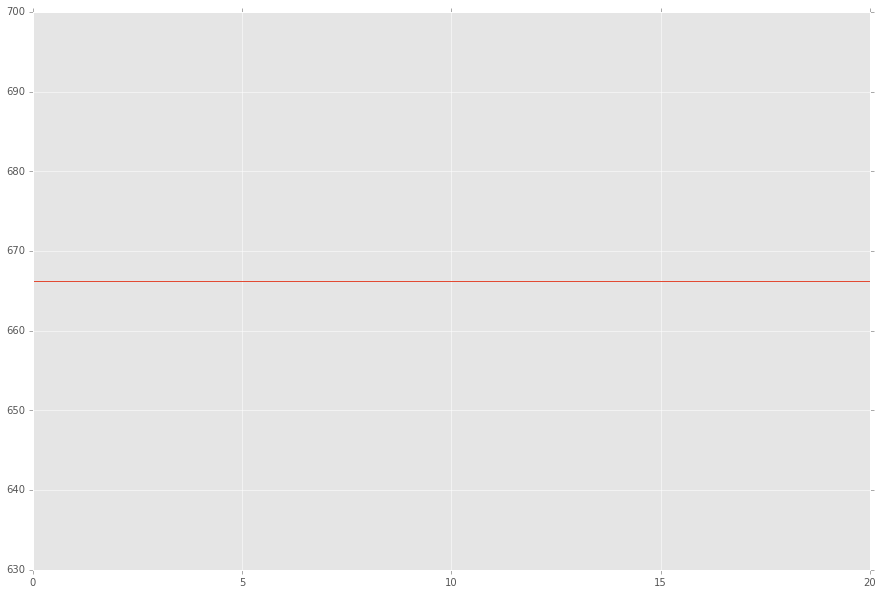

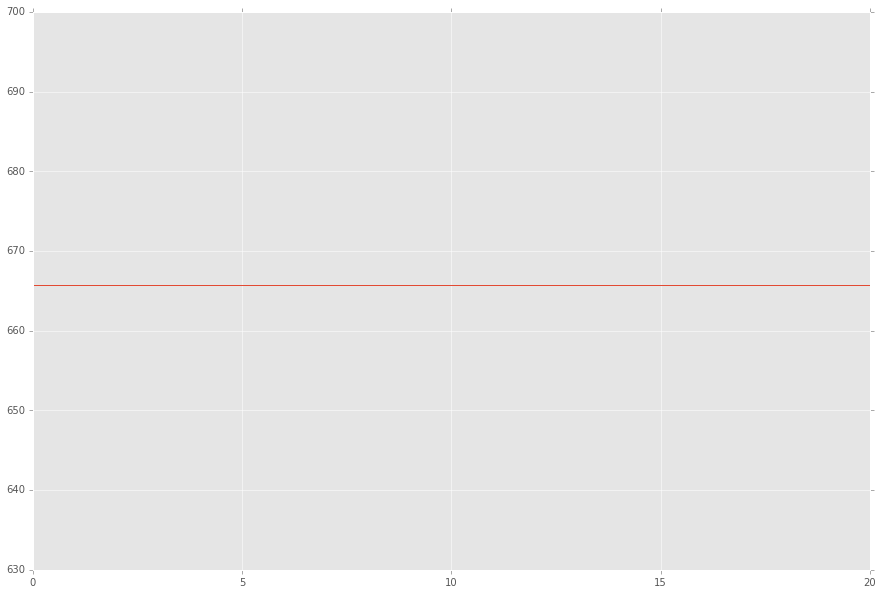

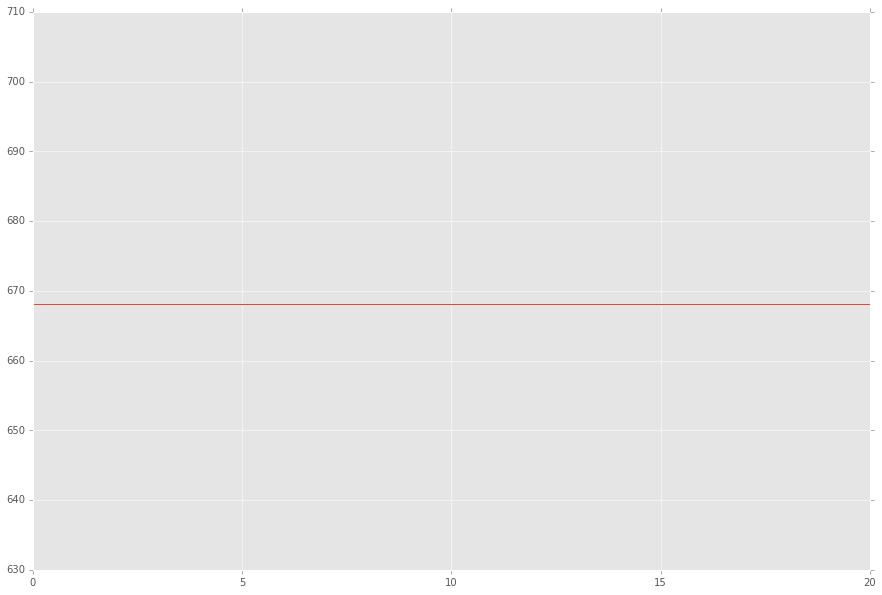

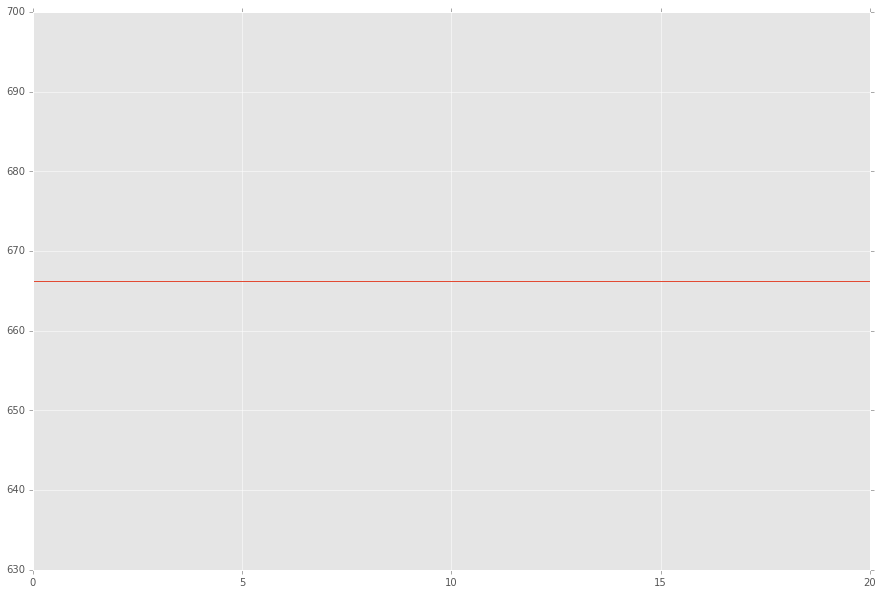

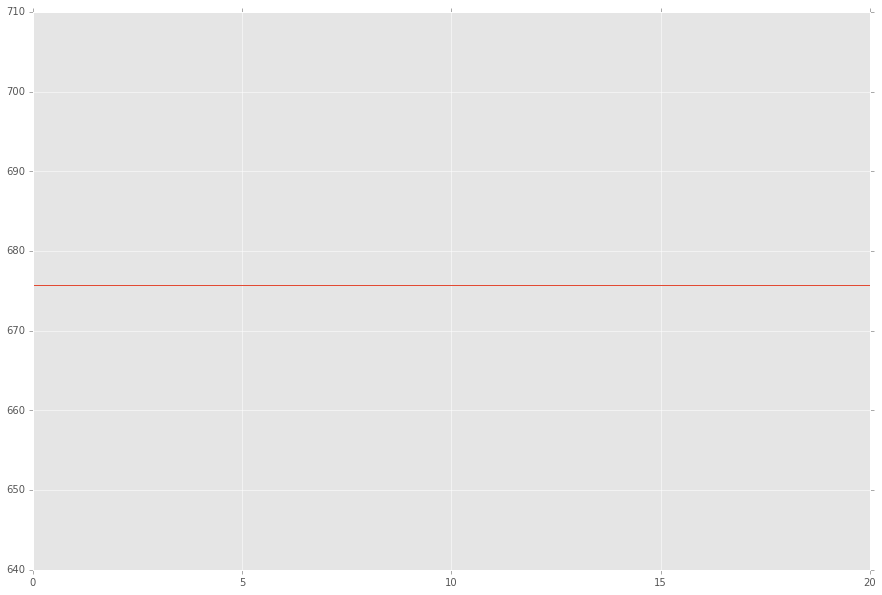

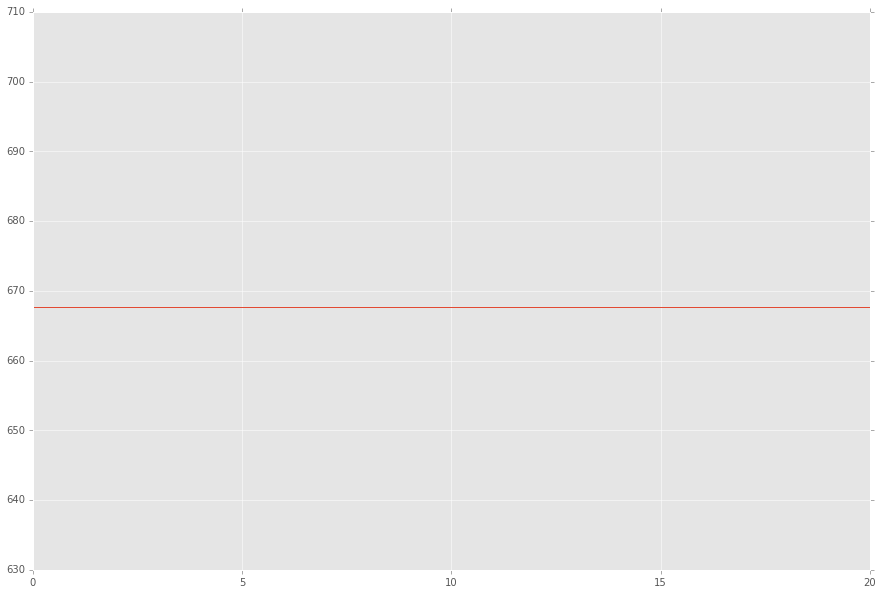

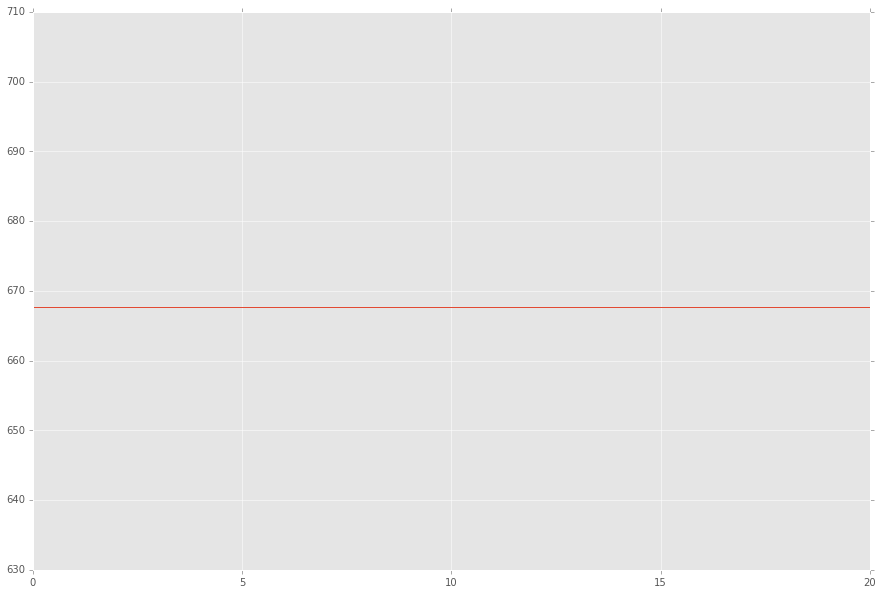

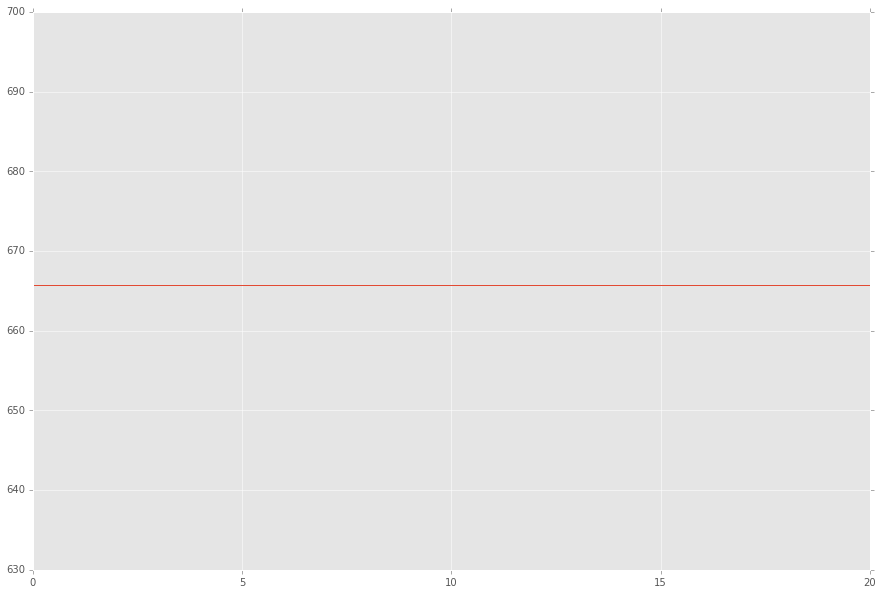

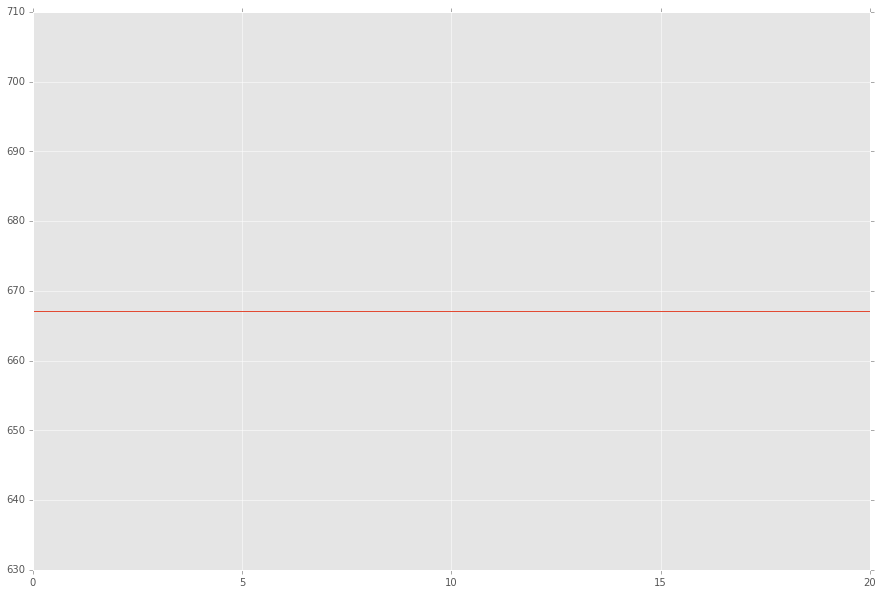

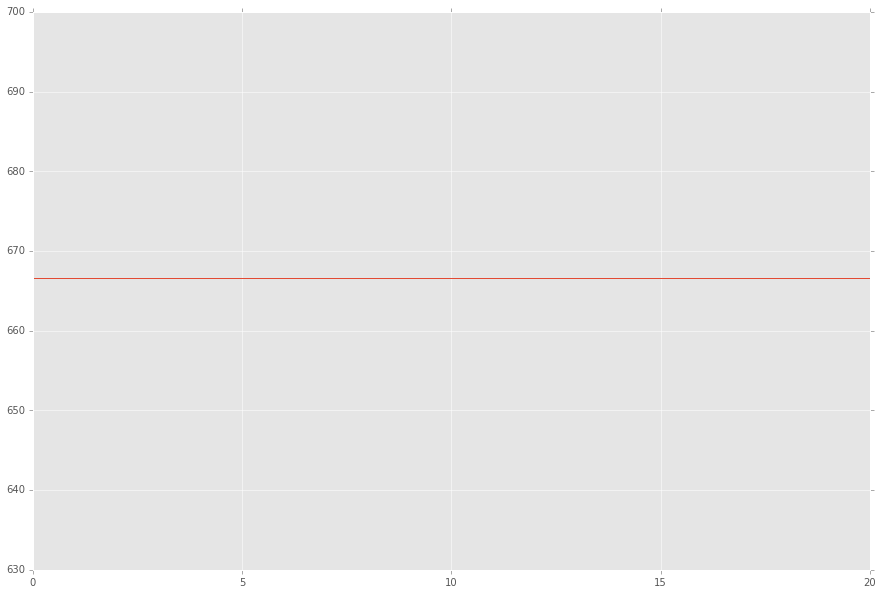

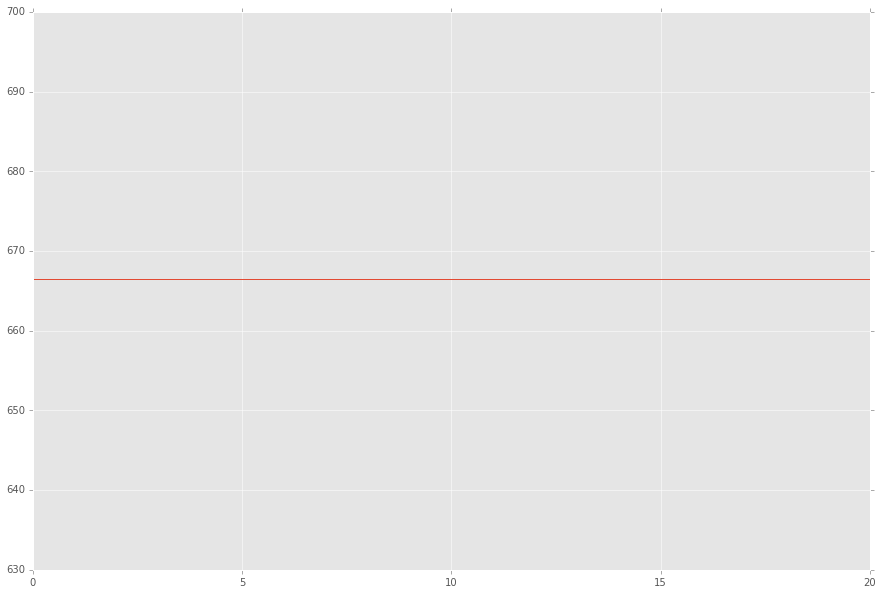

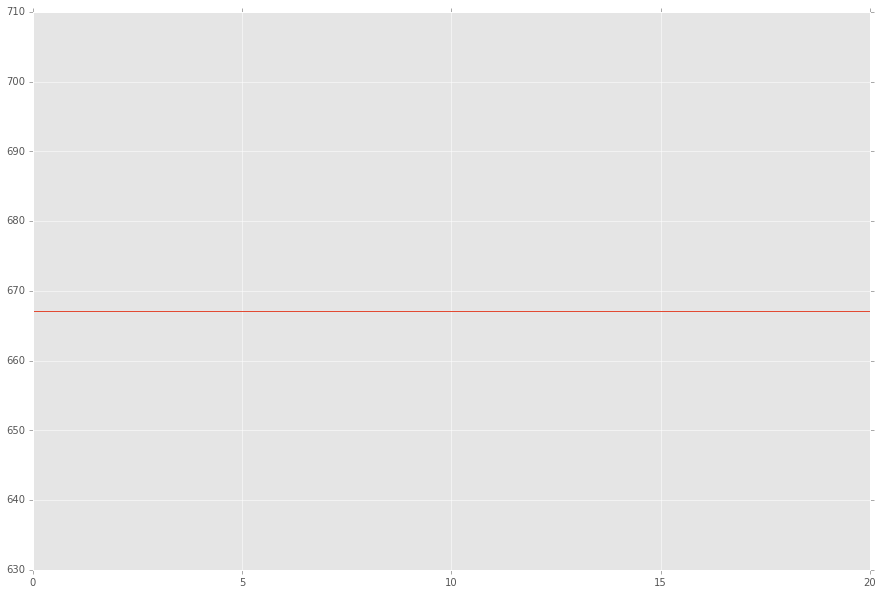

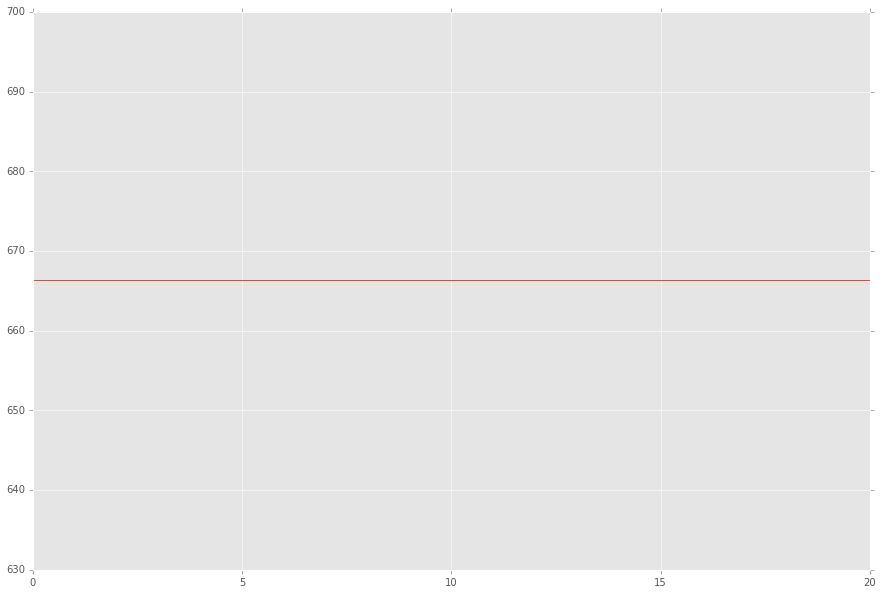

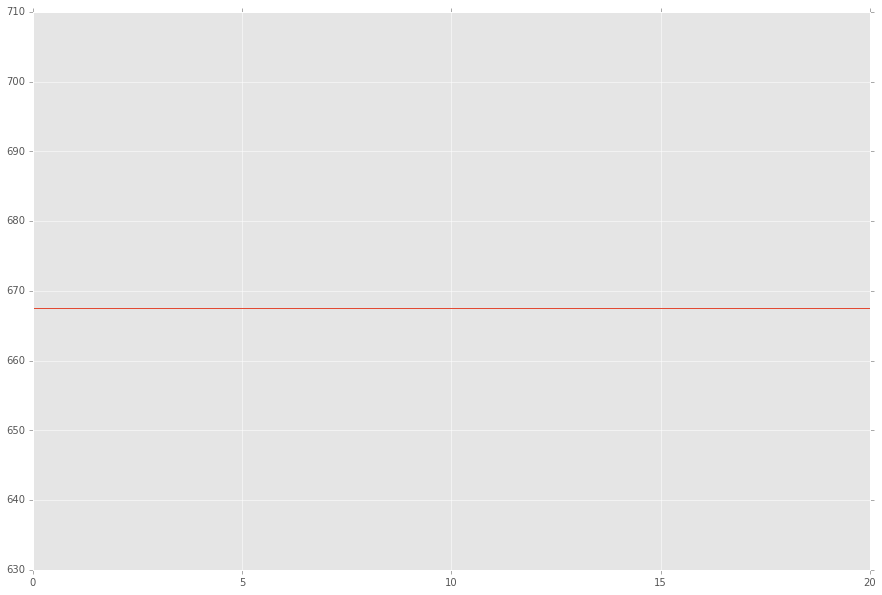

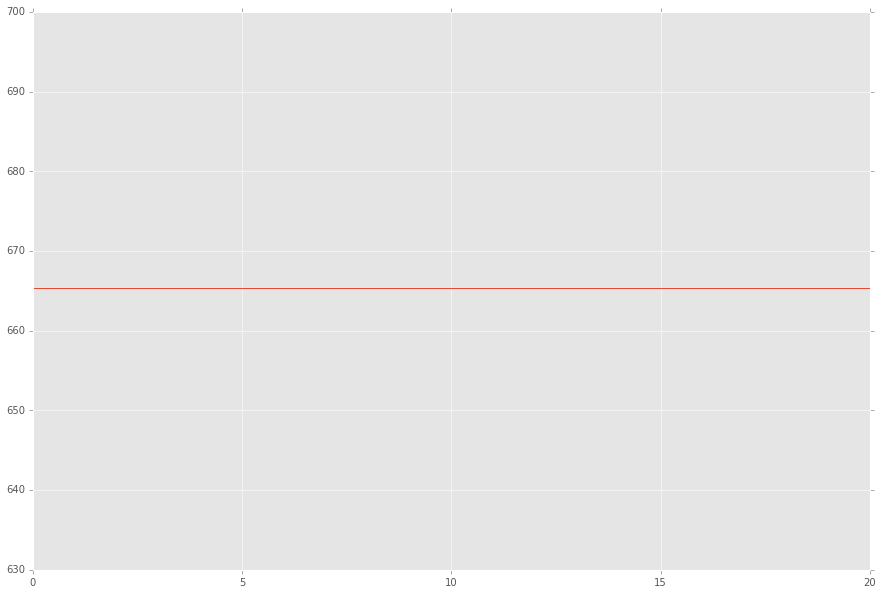

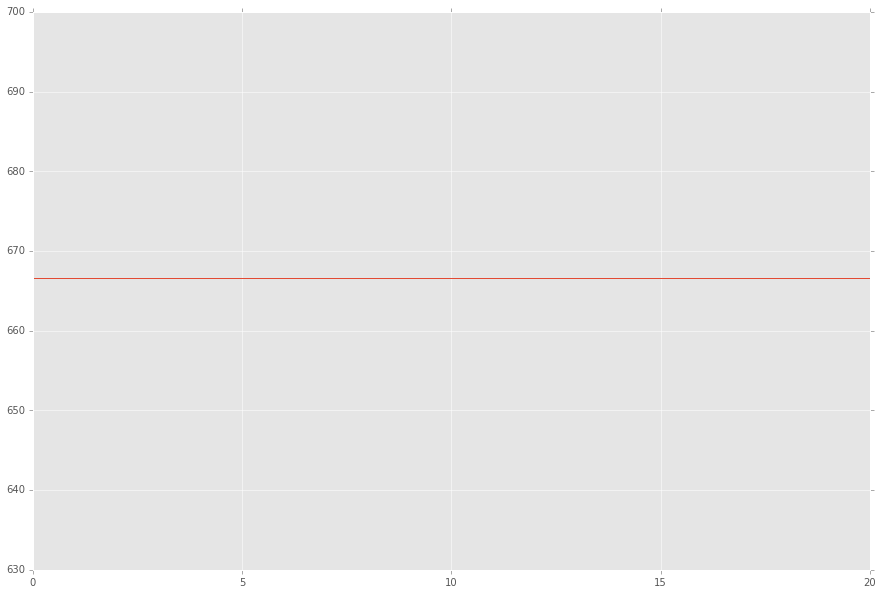

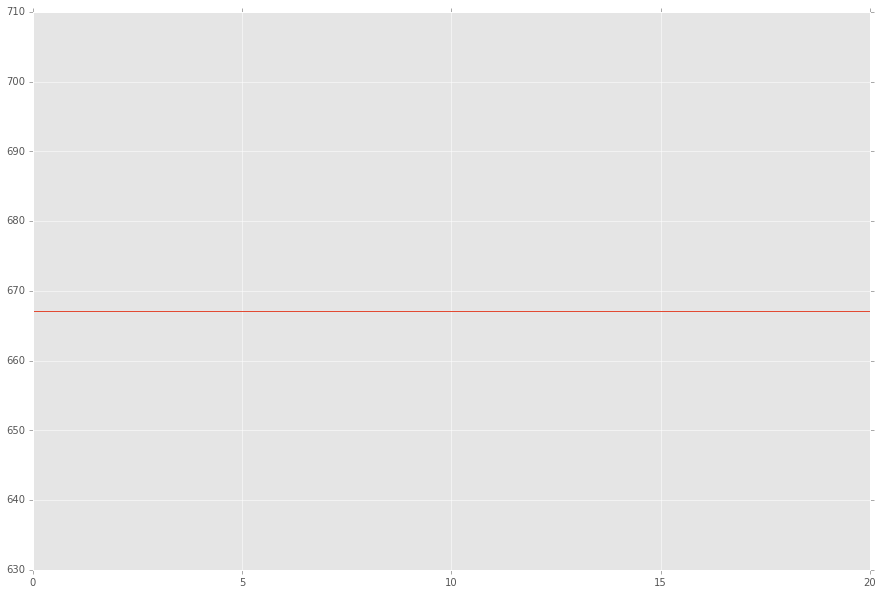

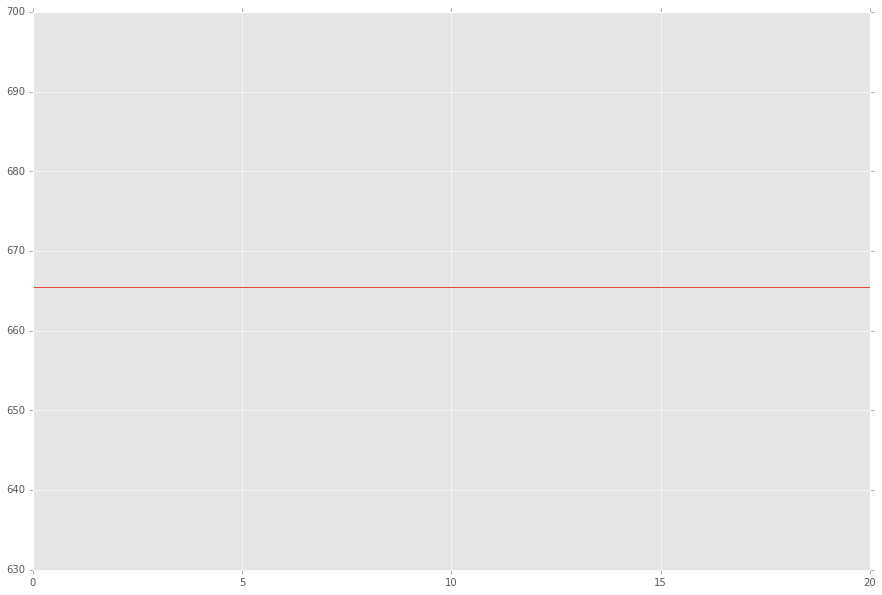

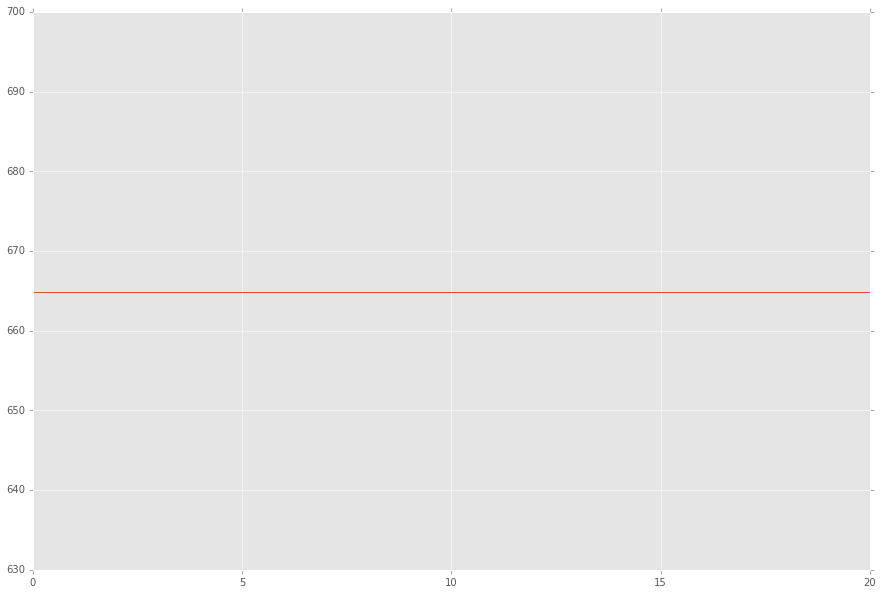

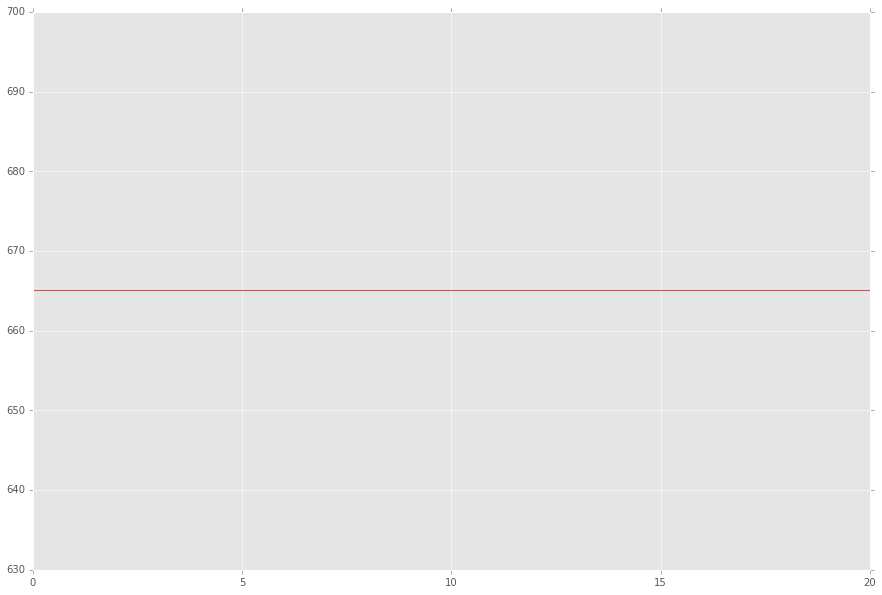

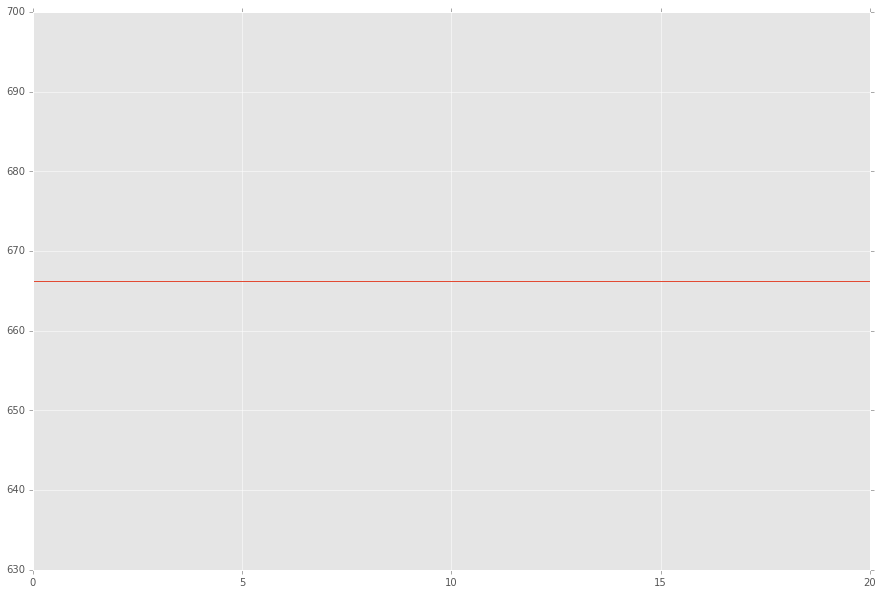

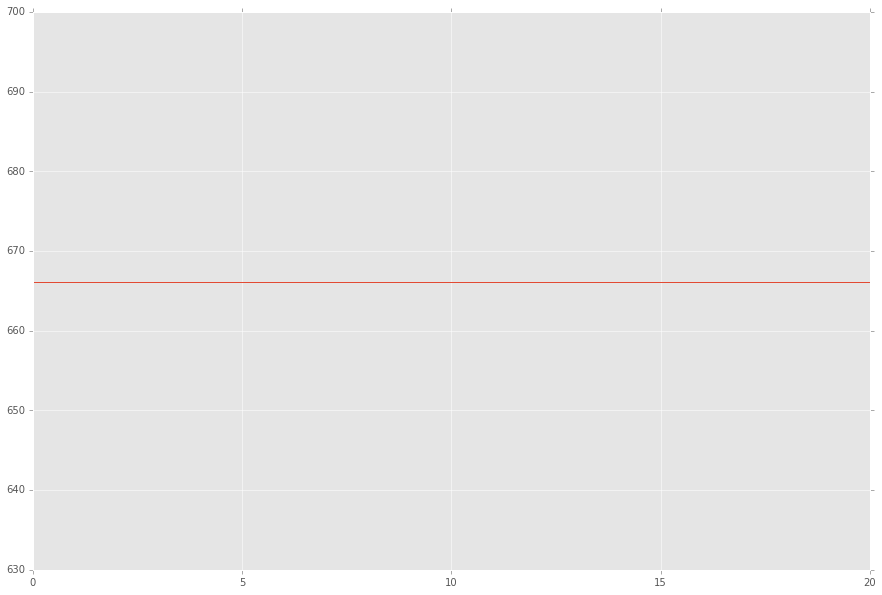

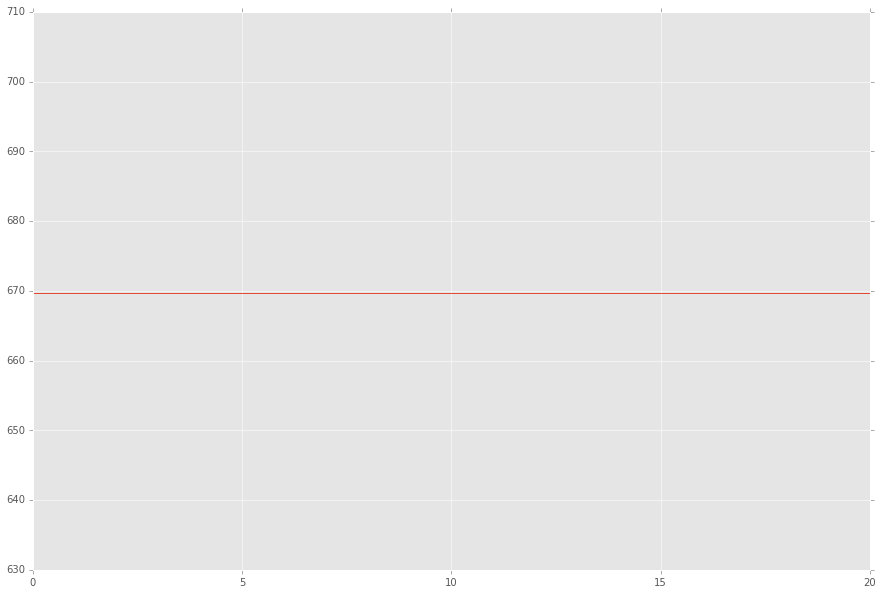

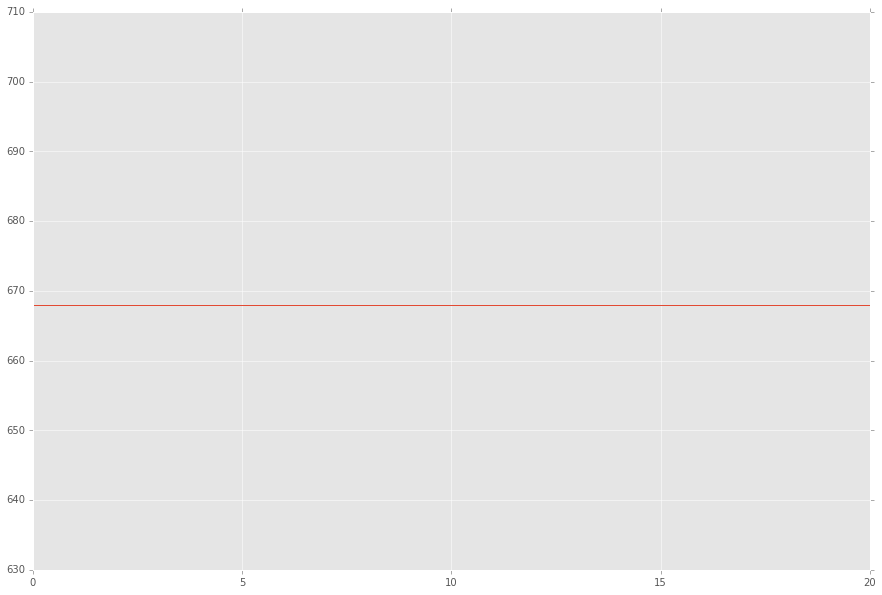

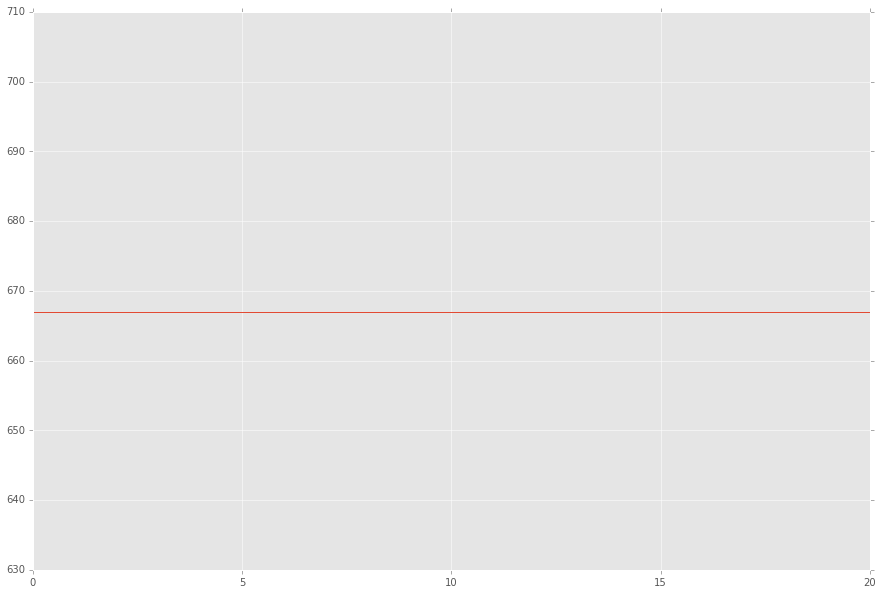

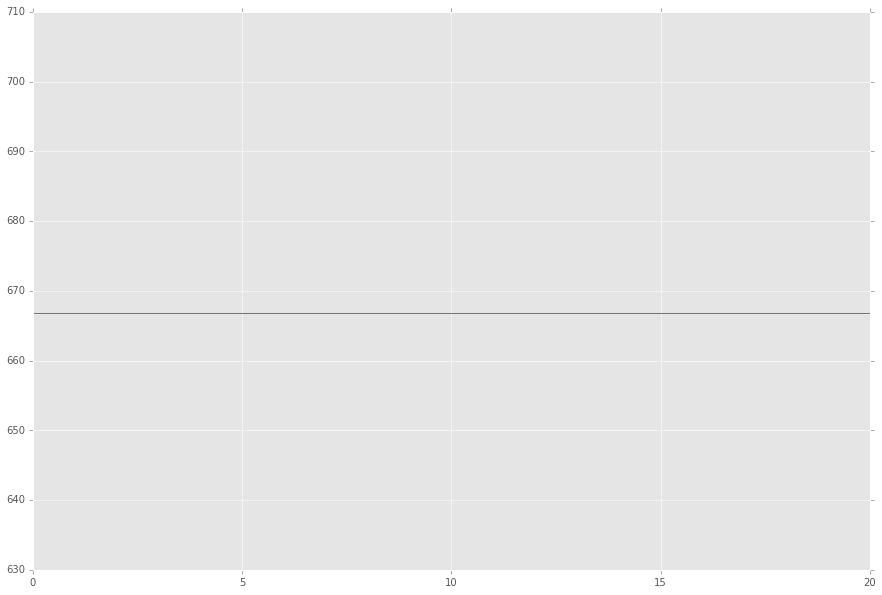

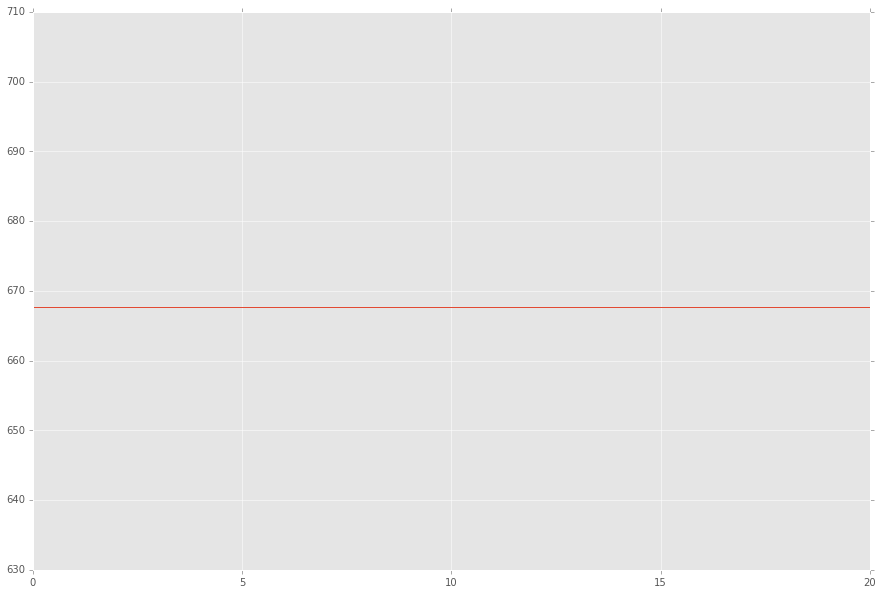

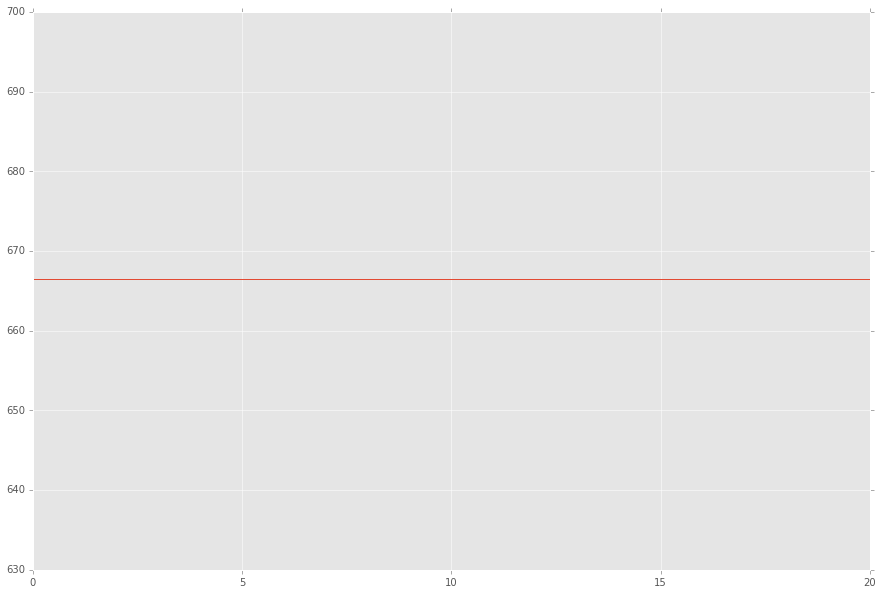

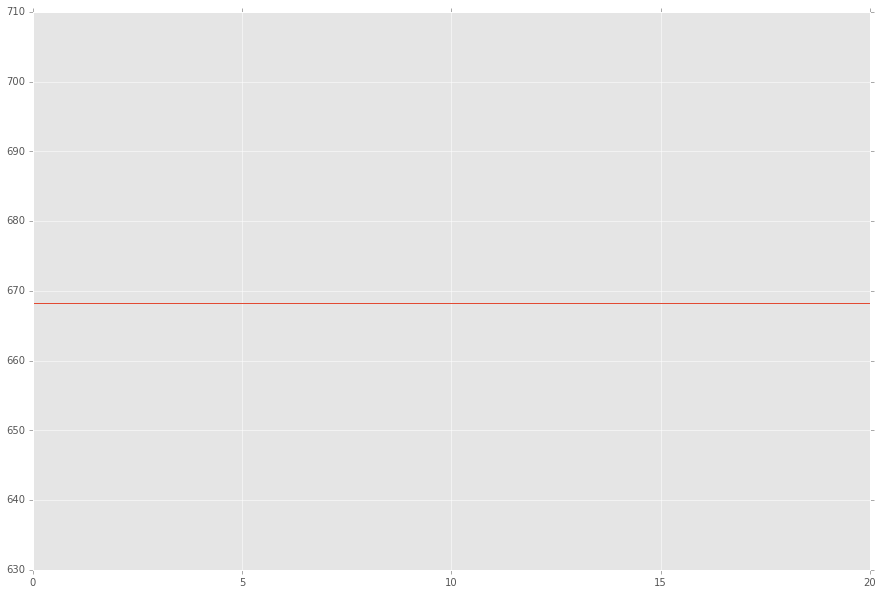

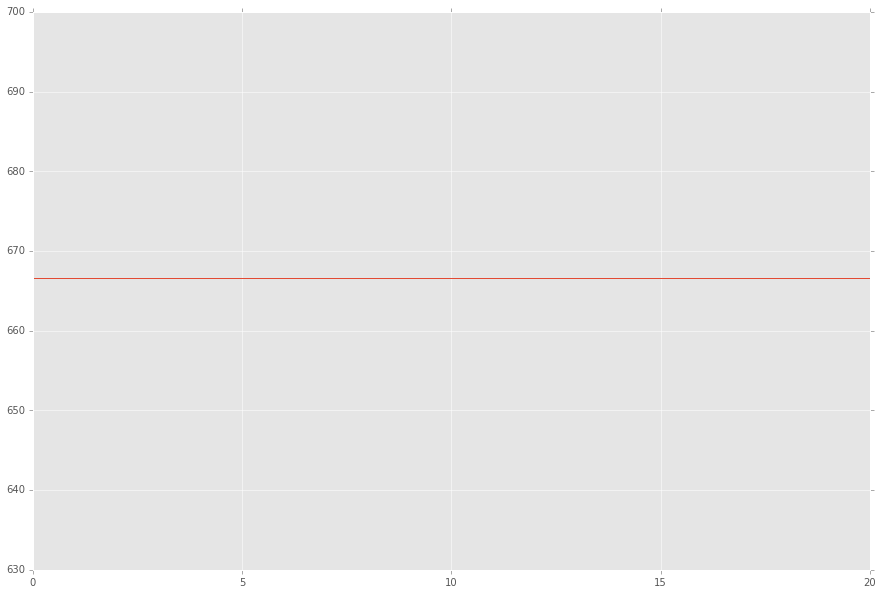

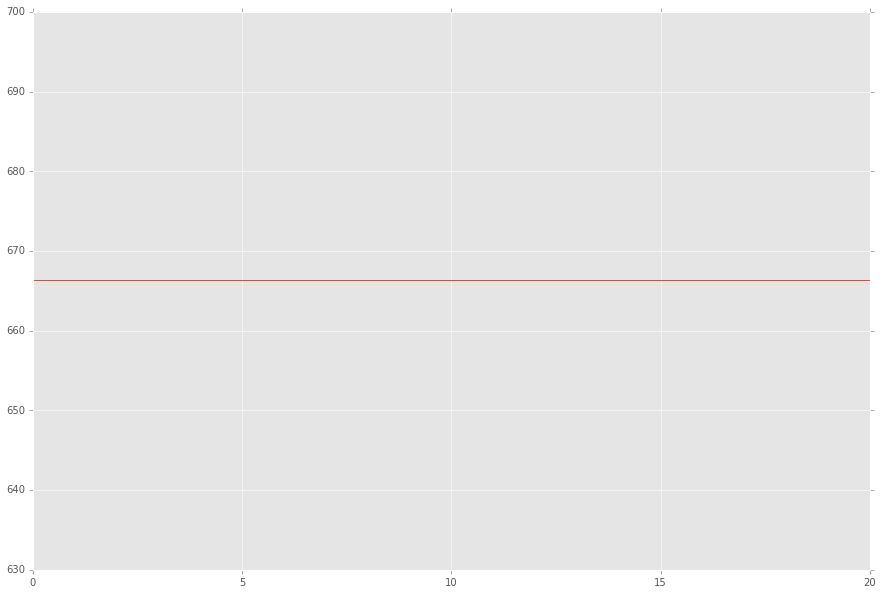

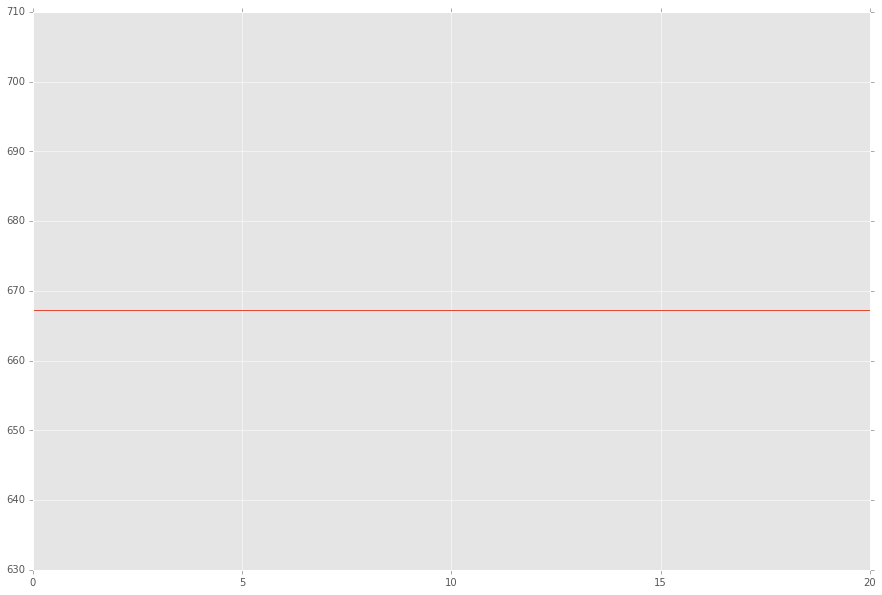

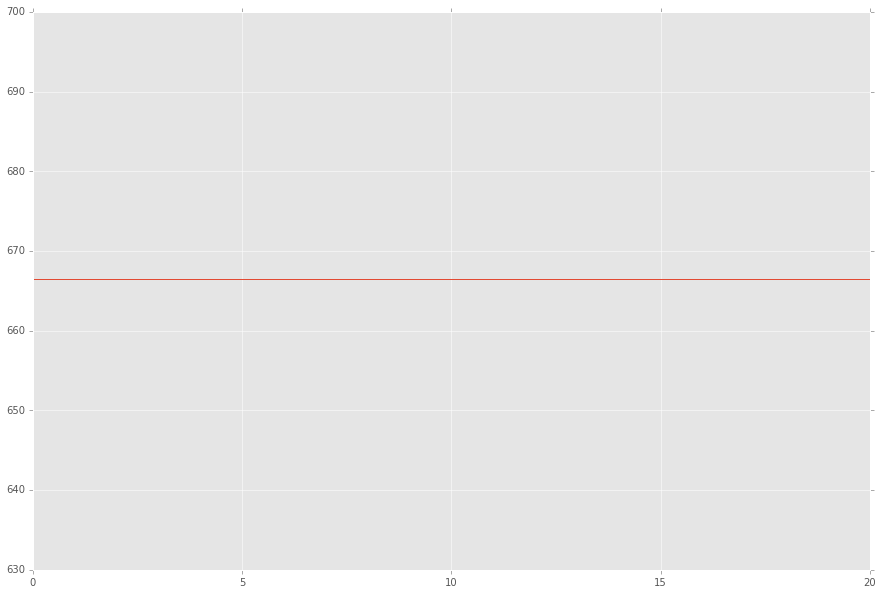

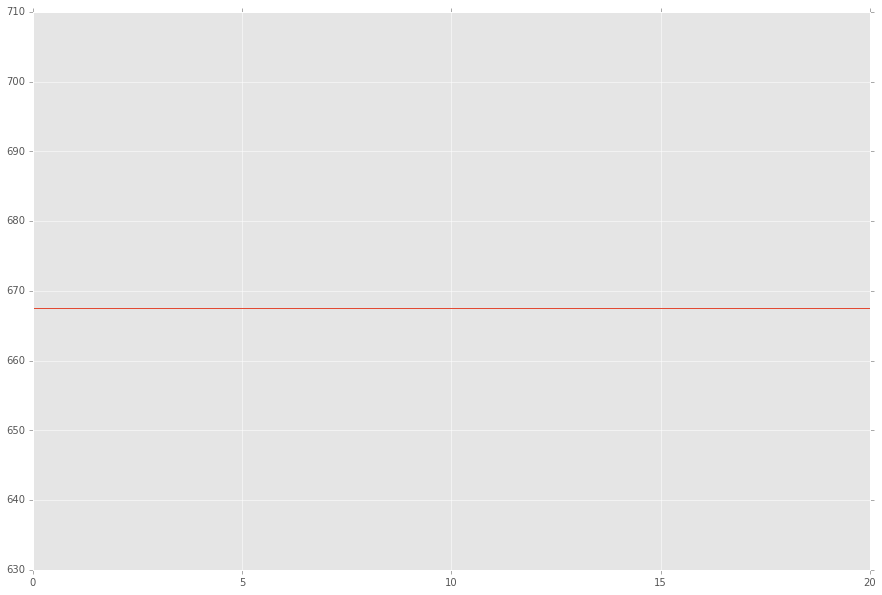

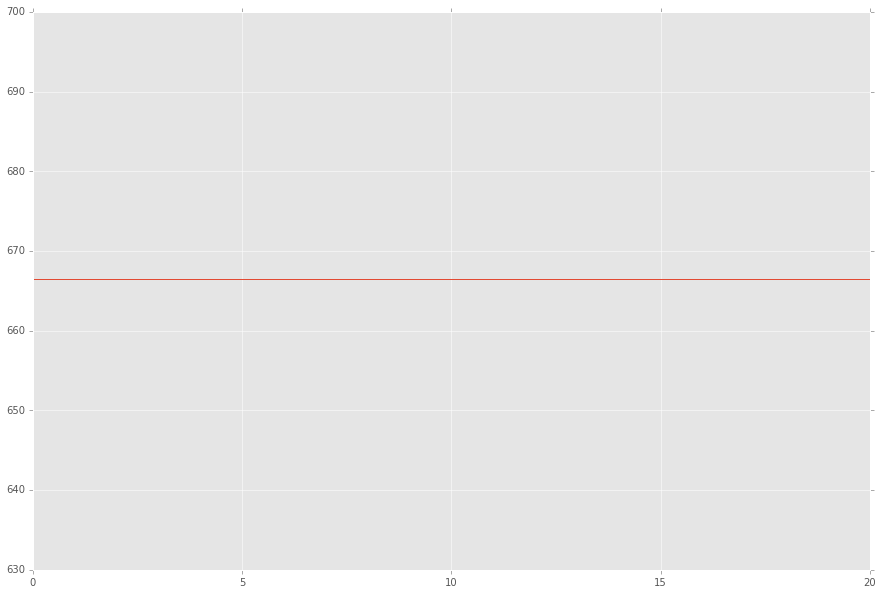

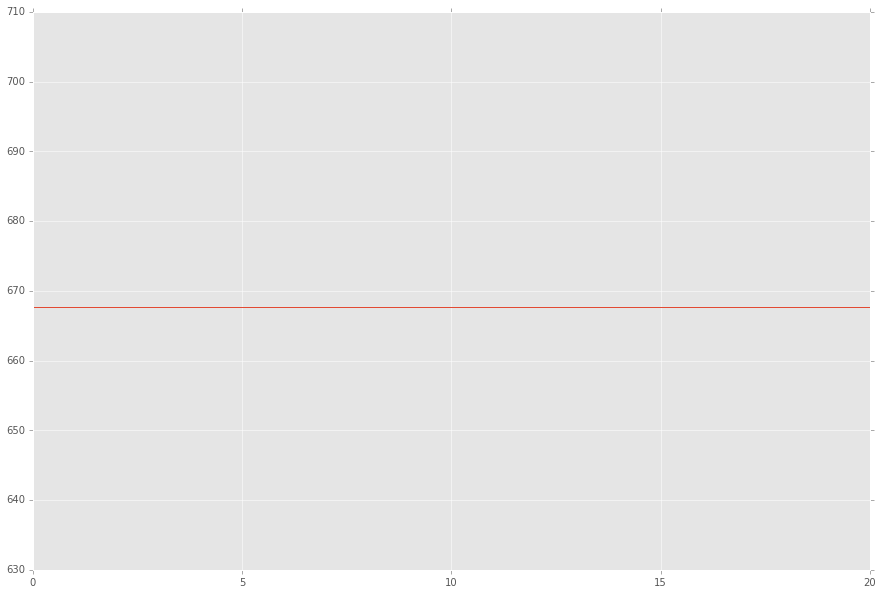

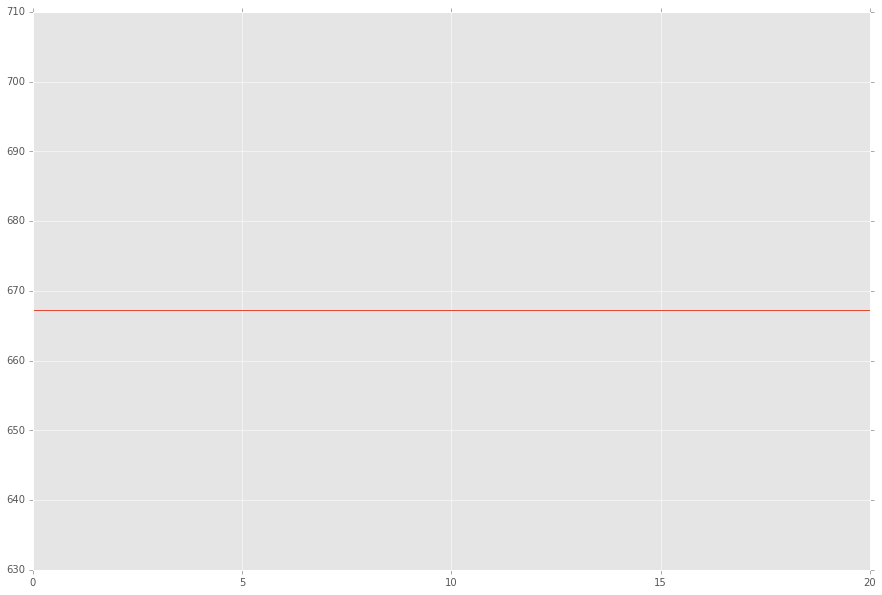

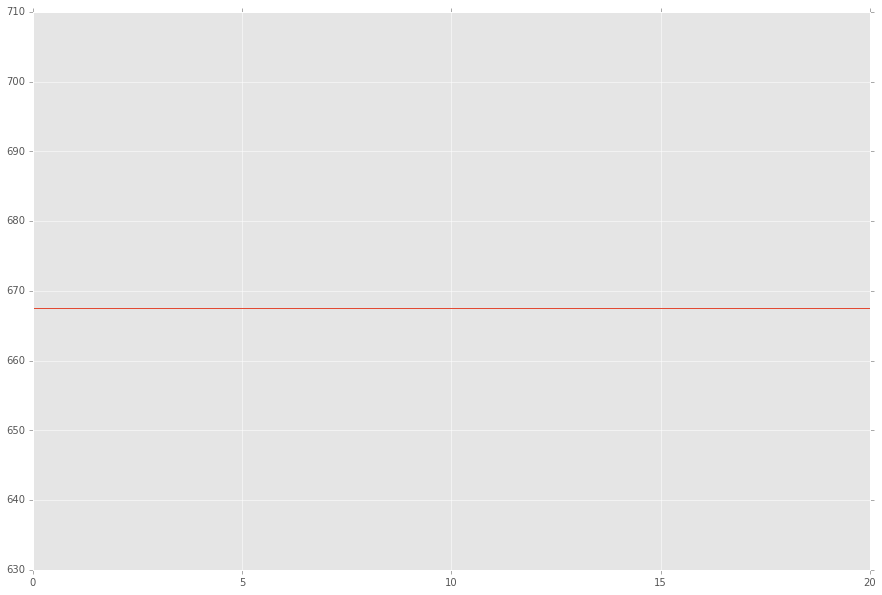

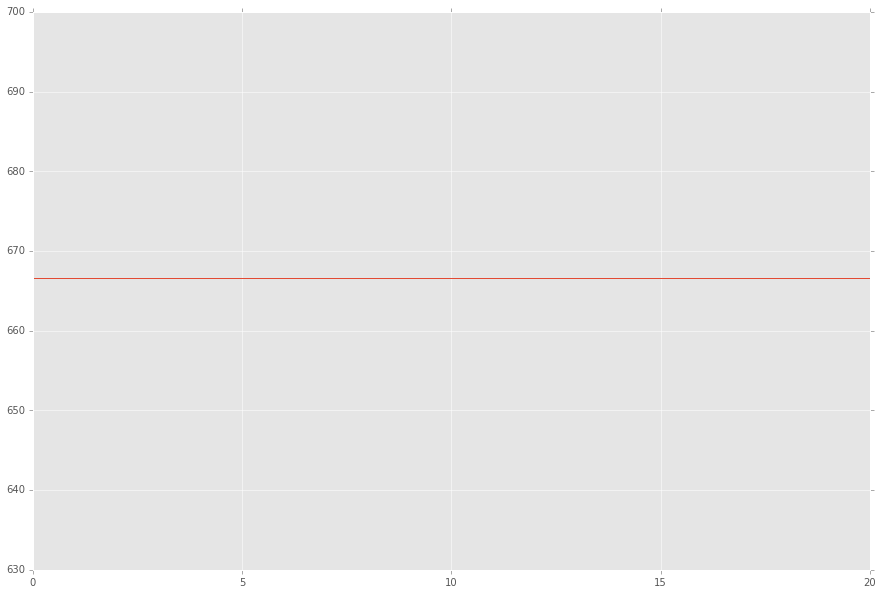

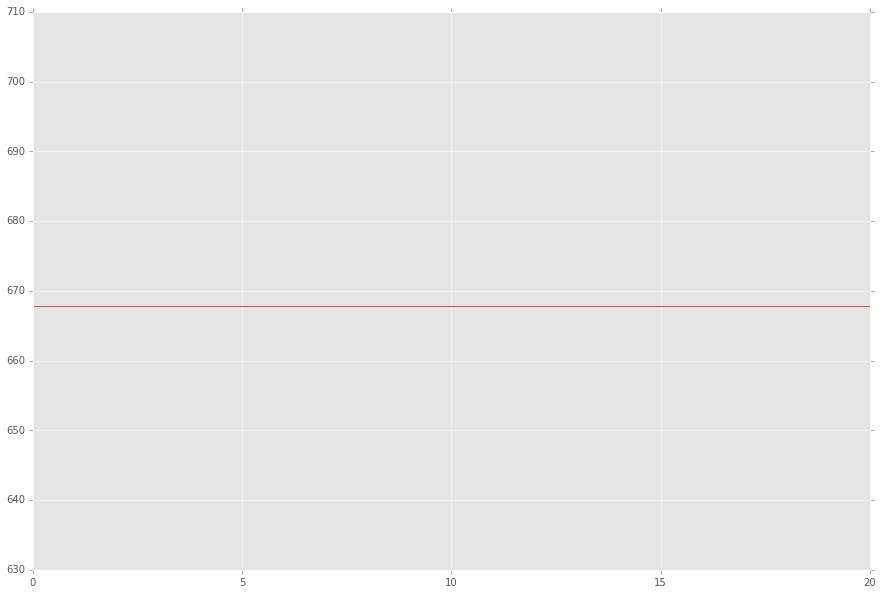

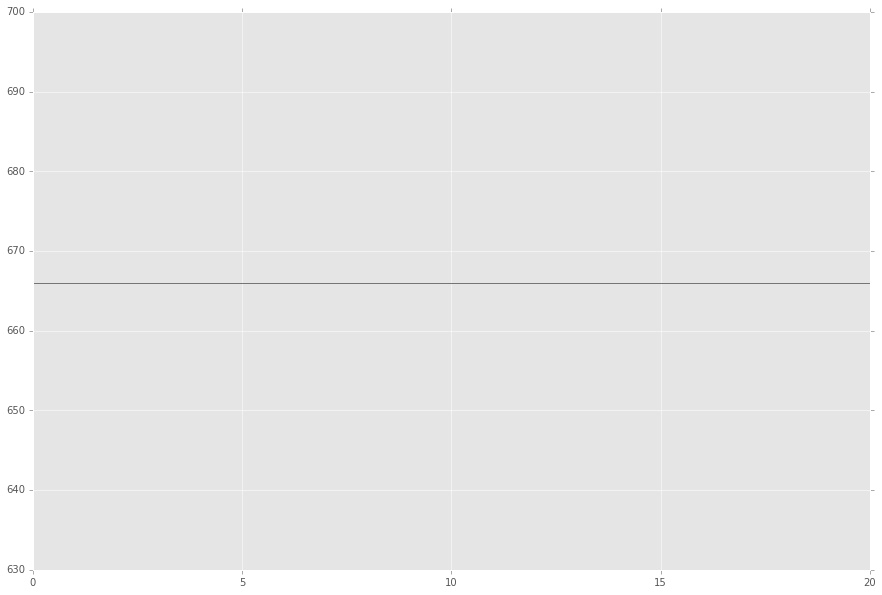

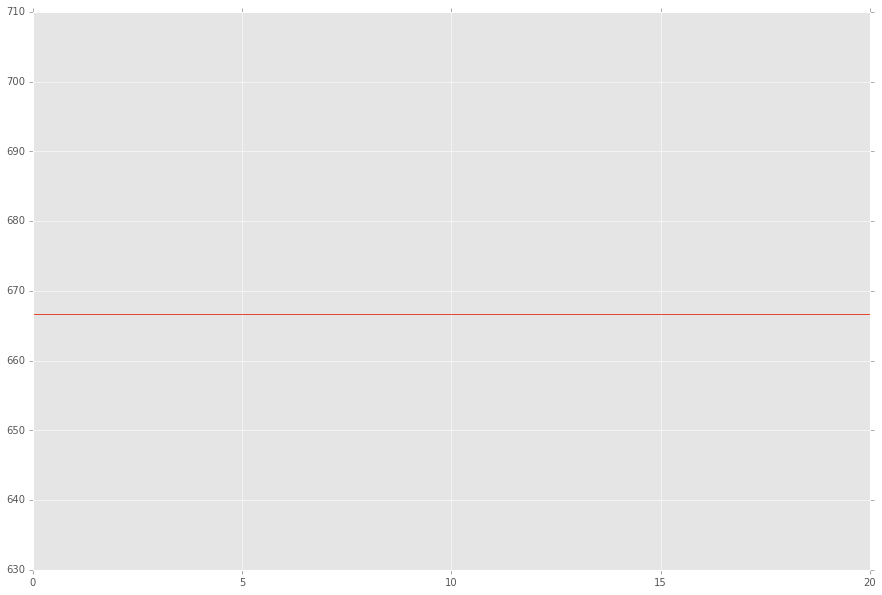

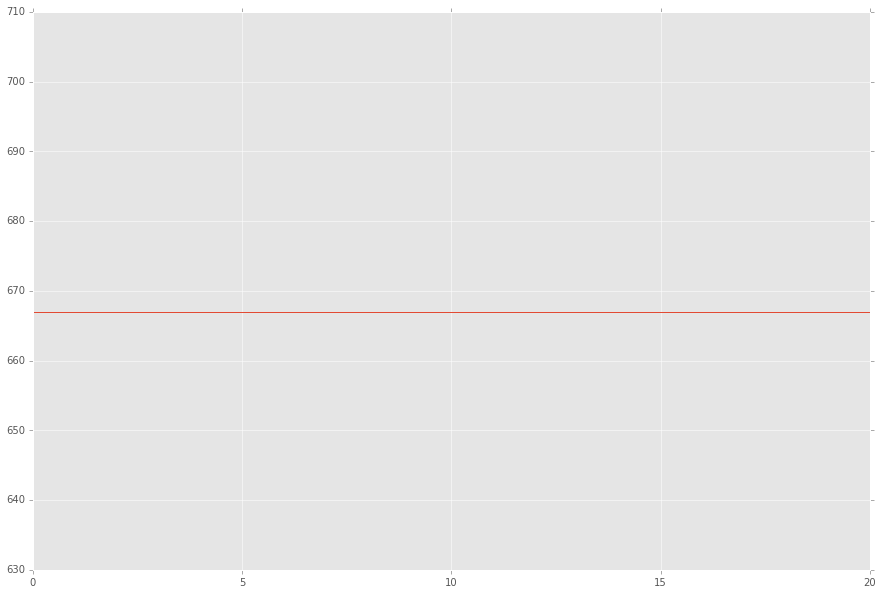

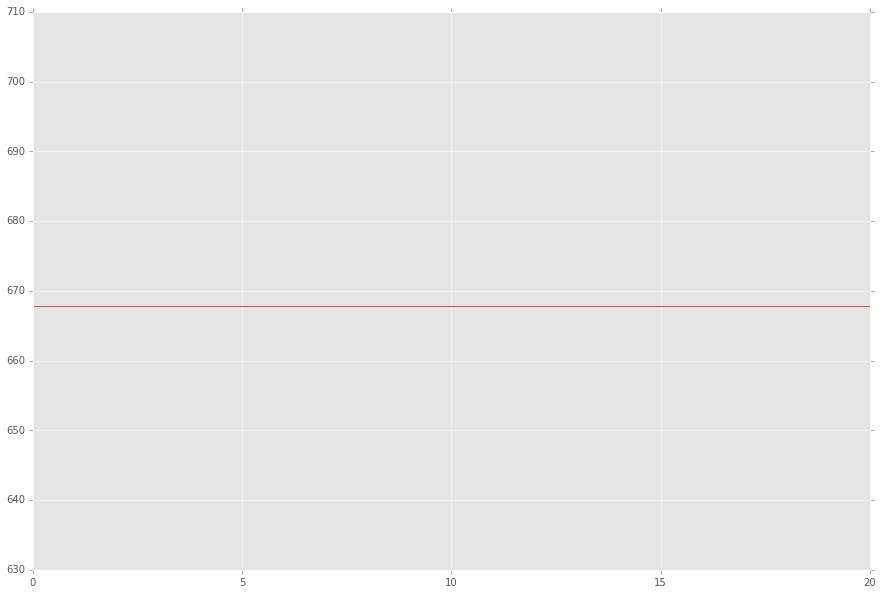

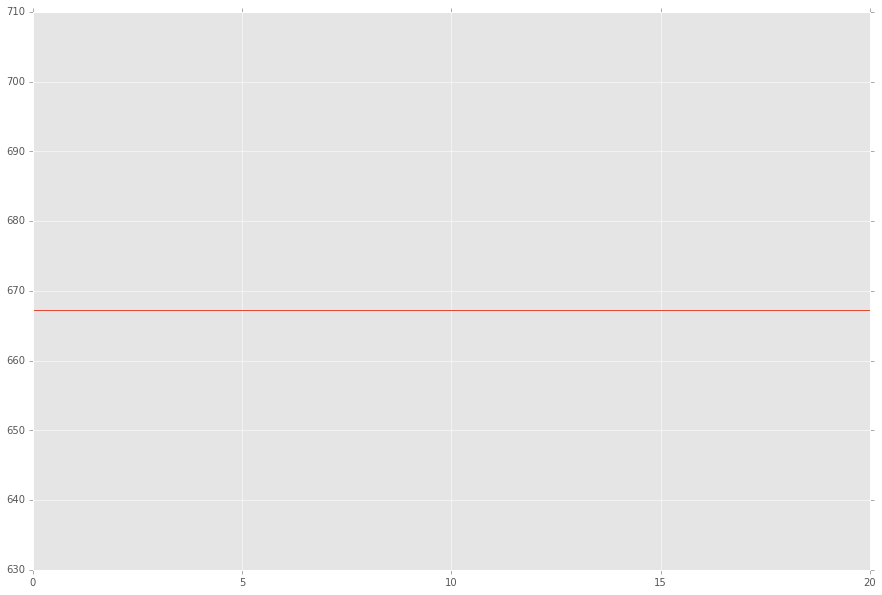

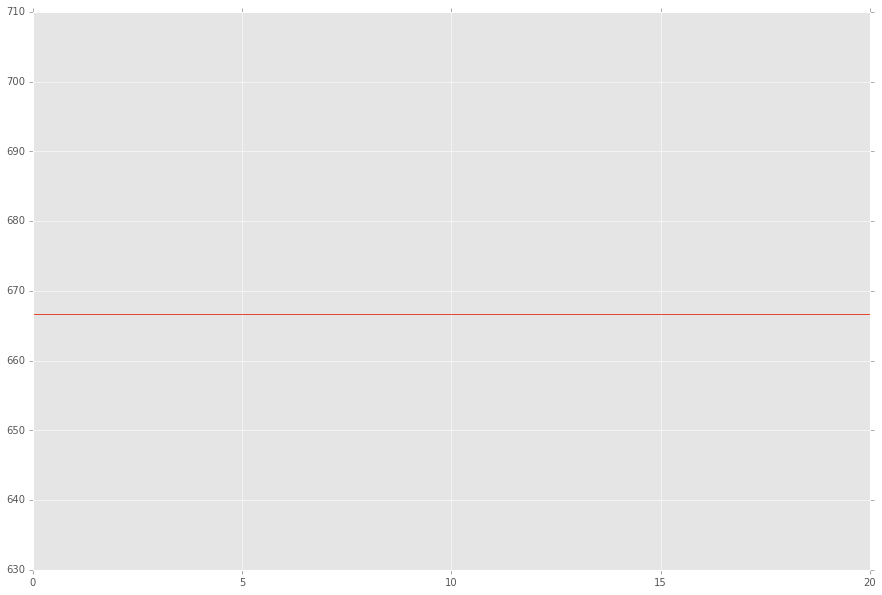

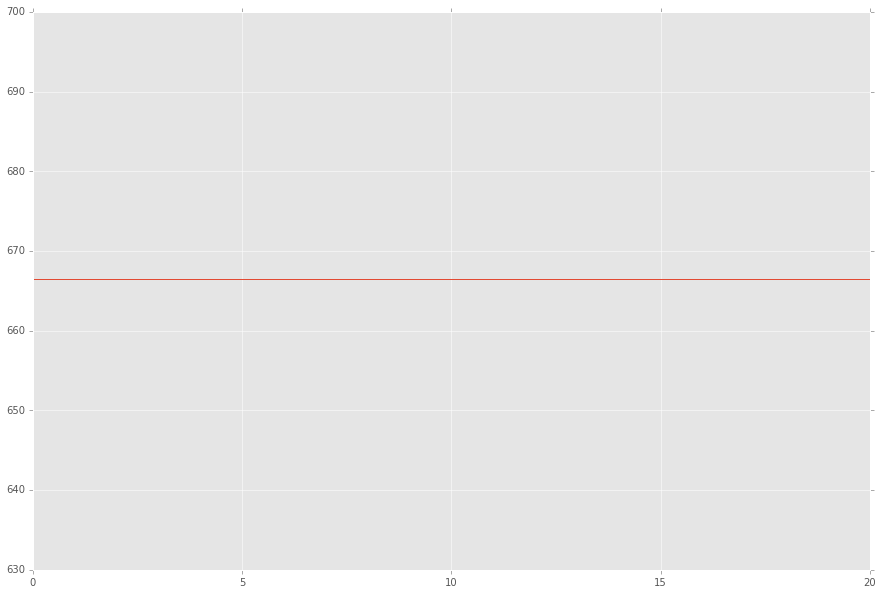

In [9]:
for i in range(50):
    plt.figure(figsize=(15,10))
    plt.plot(np.linspace(0,20,20),fracerr[i])

In [12]:
np.save("Accuracy_Data_run_13", acc0)

0.968592964824


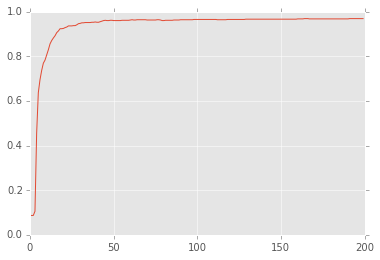

In [14]:
plt.plot(acc0)
print(np.amax(acc0))

In [25]:
def plot_epochs(az_angle, eleva):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,200,200), np.linspace(0,10, 10))
    ax.plot_surface(np.linspace(0,100,100),fracerr, accu)
    ax.view_init(elev=eleva, azim=az_angle)

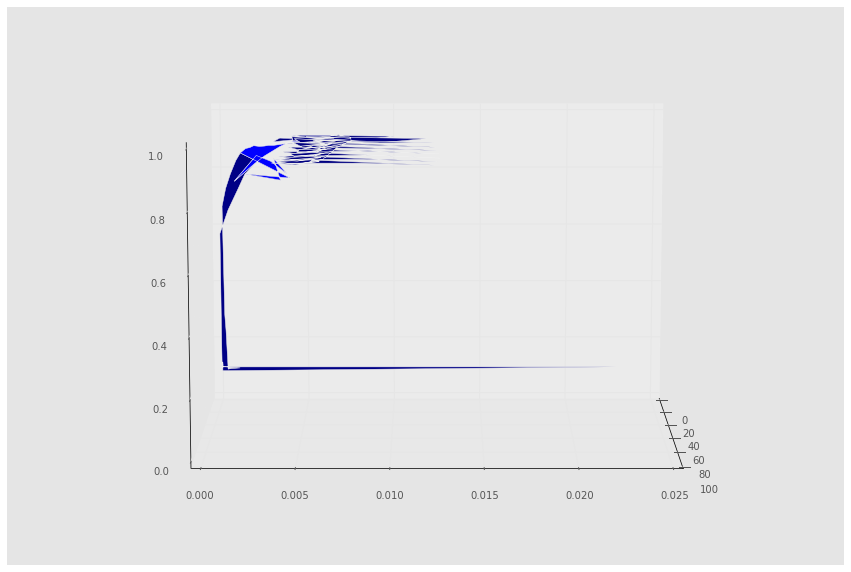

In [26]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1))

In [10]:
acc_max = []
fract_err = []
for i in range(50):
    acc_max.append(np.amax(accu[i]))
    fract_err.append(fracerr[i][0])
print(acc_max,fract_err)

([0.92587939698492461, 0.914572864321608, 0.91080402010050254, 0.87185929648241201, 0.90577889447236182, 0.91708542713567842, 0.91331658291457285, 0.90829145728643212, 0.92462311557788945, 0.91959798994974873, 0.89698492462311563, 0.914572864321608, 0.914572864321608, 0.91708542713567842, 0.93341708542713564, 0.93090452261306533, 0.90703517587939697, 0.93341708542713564, 0.92085427135678388, 0.91959798994974873, 0.89447236180904521, 0.91959798994974873, 0.89949748743718594, 0.93090452261306533, 0.92713567839195976, 0.91959798994974873, 0.90326633165829151, 0.88316582914572861, 0.90954773869346739, 0.92085427135678388, 0.90954773869346739, 0.90201005025125625, 0.93216080402010049, 0.90075376884422109, 0.90201005025125625, 0.91331658291457285, 0.9120603015075377, 0.90703517587939697, 0.93341708542713564, 0.91080402010050254, 0.9233668341708543, 0.90577889447236182, 0.93090452261306533, 0.9346733668341709, 0.91080402010050254, 0.92085427135678388, 0.89949748743718594, 0.90577889447236182,

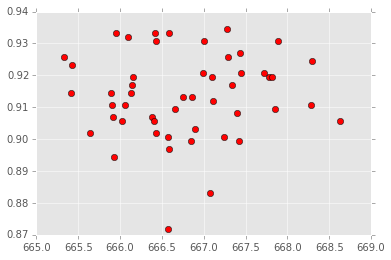

In [11]:
plt.plot(fract_err, acc_max, "ro")

In [12]:
sts.pearsonr(fract_err, acc_max)

(0.050482614923083119, 0.72772045942019747)